In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
path='C:\\Users\\kalas\\Downloads\\'
train=pd.read_csv(path+'train.csv')
test=pd.read_csv(path+'test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_shape = train.shape
print(train_shape)

(891, 12)


In [5]:
test.shape

(418, 11)

In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Bar graph of people acc. to ticket class in which people can not survived  ')

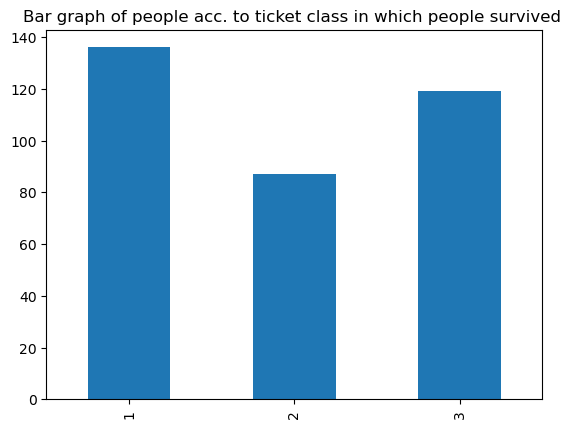

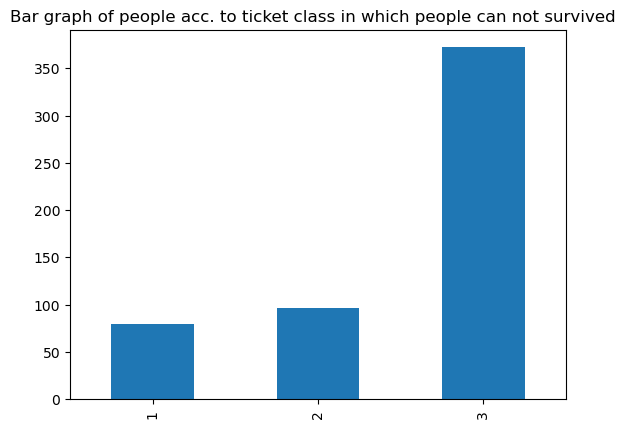

In [8]:
plt.figure(1)
train.loc[train['Survived']==1,'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Bar graph of people acc. to ticket class in which people survived ')

plt.figure(2)
train.loc[train['Survived']==0,'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Bar graph of people acc. to ticket class in which people can not survived  ')


(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([ 0.,  9., 18., 27., 36., 45., 54., 63., 72., 81., 90.]),
 <BarContainer object of 10 artists>)

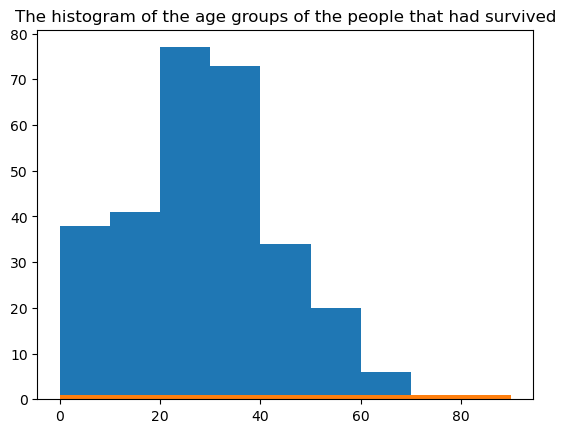

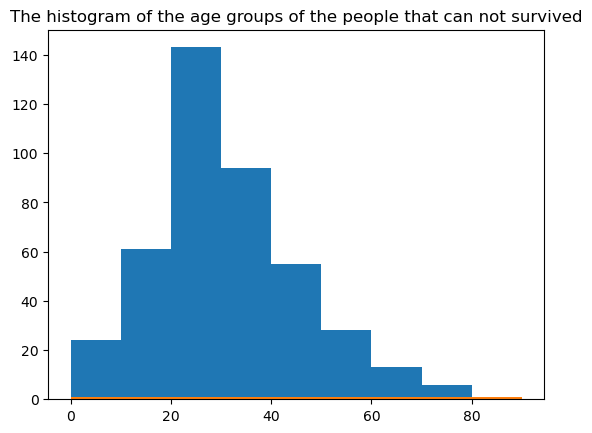

In [9]:
plt.figure(1)
age=train.loc[train.Survived==1,'Age']
plt.title('The histogram of the age groups of the people that had survived')
plt.hist(age,np.arange(0,100,10))
plt.hist(np.arange(0,100,10))

plt.figure(2)
age=train.loc[train.Survived==0,'Age']
plt.title('The histogram of the age groups of the people that can not survived')
plt.hist(age,np.arange(0,100,10))
plt.hist(np.arange(0,100,10))

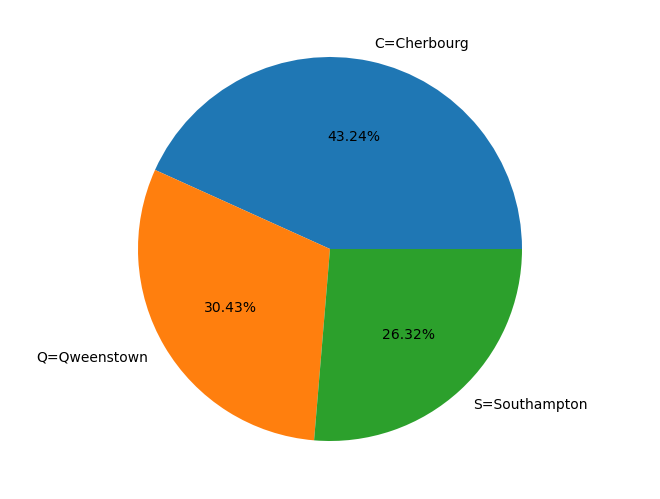

In [10]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.axis('equal')
l=['C=Cherbourg','Q=Qweenstown','S=Southampton']
s=[0.553571,0.389610,0.336957]
ax.pie(s,labels=l,autopct='%1.2f%%')
plt.show()

In [11]:
train[["Pclass","Survived"]].groupby(["Pclass"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:
train[["SibSp","Survived"]].groupby(["SibSp"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [13]:
train[["Embarked","Survived"]].groupby(["Embarked"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [14]:
train=train.drop(['Ticket'],axis=1)
test=test.drop(['Ticket'],axis=1)
train=train.drop(['Cabin'],axis=1)
test=test.drop(['Cabin'],axis=1)
train=train.drop(['Name'],axis=1)
test=test.drop(['Name'],axis=1)

In [15]:
Column_train=['Age','Pclass','SibSp','Parch','Fare','Sex','Embarked']

In [16]:
X=train[Column_train]
Y=train['Survived']

In [17]:
#X['Age']=X['Age'].fillna(X['Age'].median())
X.loc[:, 'Age'] = X['Age'].fillna(X['Age'].median())
X['Age'].isnull().sum()

0

In [18]:
d={'male':0,'female':1}
X['Sex']=X['Sex'].apply(lambda x:d[x])
X['Sex'].head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [19]:
e={'C':0,'Q':1,'S':2}
X['Embarked']=X['Embarked'].apply(lambda x:e[x] if x in e else None)
X['Embarked'].head()

0    2.0
1    0.0
2    2.0
3    2.0
4    2.0
Name: Embarked, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=7)

# logistic regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
model=LogisticRegression()
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)

from sklearn.metrics import accuracy_score
lr=accuracy_score(Y_test,Y_pred)*100
lr

75.74626865671642

# Gaussian Navie_bayes model

In [22]:
from sklearn.naive_bayes import GaussianNB
model1=GaussianNB()
model1.fit(X_train,Y_train)
Y_pred1=model1.predict(X_test)
gnb=accuracy_score(Y_test,Y_pred1)*100
gnb

76.86567164179104

# Decision Tree Model

In [23]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier(criterion='entropy',random_state=7)
model2.fit(X_train,Y_train)
Y_pred2=model2.predict(X_test)
dt=accuracy_score(Y_test,Y_pred2)*100
dt

74.25373134328358

# Results

In [26]:
results=pd.DataFrame({
    'Model':['Logistic Regression','Naive Bayes','Decision tree'],
    'Score':[lr,gnb,dt]
})
result_df=results.sort_values(by='Score',ascending=False)
result_df=result_df.set_index('Model')
result_df

,Score
Model,
Naive Bayes,76.865672
Logistic Regression,75.746269
Decision tree,74.253731
